Objective: Use clustering algorithms to categorize similar players using their traits and their different skills in the field

Through this project we are going to derive clusters based on different clustering methods

# Fifa20

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings ('ignore')


Read Data
#we shall look at how our raw data looks like to take decisions on cleaning it up


In [ ]:
fifa = pd.read_csv('data\players_20.csv') # read the data
pd.set_option("display.max_columns", None) # display all columns

fifa.head(5)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

We will separate the "short_name" column so that it can be used later to categorize the cluster

In [ ]:
s_name = fifa.short_name.tolist() 

fifa = fifa.drop(['short_name'], axis = 1) # drop the short_name column


# EDA

Basic data exploration

In [ ]:
fifa.shape

(18278, 103)

In [ ]:
#Check what type data we have
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 103 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(42)
memory usage: 14.4+ MB


Our dataset consists of information of about 18278 players across 104 variables, and it has three different types of data types - 16 float variable, 45 integer and 43 categorical

#### Number of missing values for every column

In [ ]:
# checking how many values are missing (NaN) before we apply cleaning methods  
    
count_nan = fifa.isnull().sum()
print (count_nan[count_nan > 0])
print (count_nan)

release_clause_eur       1298
player_tags             16779
team_position             240
team_jersey_number        240
loaned_from             17230
joined                   1288
contract_valid_until      240
nation_position         17152
nation_jersey_number    17152
pace                     2036
shooting                 2036
passing                  2036
dribbling                2036
defending                2036
physic                   2036
gk_diving               16242
gk_handling             16242
gk_kicking              16242
gk_reflexes             16242
gk_speed                16242
gk_positioning          16242
player_traits           10712
ls                       2036
st                       2036
rs                       2036
lw                       2036
lf                       2036
cf                       2036
rf                       2036
rw                       2036
lam                      2036
cam                      2036
ram                      2036
lm        

### Data Cleaning

###### identifying duplicate column
Some of the columns like eg ls, st, rs were duplicates (had the same values). In football, each such set basically stand for the same position e.g. 'forward'. Hence the duplicate columns will be eliminated.

In [ ]:
def getDuplicateColumns(fifa):
    duplicateColumnNames=set()
    for x in range (fifa.shape[1]):
        col=fifa.iloc[:, x]
        for y in range (x+1, fifa.shape[1]):
            otherCol=fifa.iloc[:,y]
            if col.equals(otherCol):
                duplicateColumnNames.add(fifa.columns.values[y])
                
    return list (duplicateColumnNames)

duplicateColumnNames = getDuplicateColumns(fifa)
for col in duplicateColumnNames:
    print('Column name : ', col)
#16 columns are duplicates, remaining 8 columns 

Column name :  rdm
Column name :  rcm
Column name :  cdm
Column name :  rs
Column name :  rm
Column name :  cb
Column name :  rcb
Column name :  cf
Column name :  rw
Column name :  st
Column name :  rf
Column name :  ram
Column name :  rb
Column name :  rwb
Column name :  cam
Column name :  cm


###### Dropping duplicate columns

In [ ]:
data=fifa.T.drop_duplicates().T 


In [ ]:
#dataTypeSeries = fifa.dtypes
#print(dataTypeSeries)

In [ ]:
#check remaining columns after dropping duplicates and also how many blanks
#count_nan = fifa.isnull().sum()
#print (count_nan[count_nan > 0])


Here we would like to explore the clustering based on only numerical data and hence decided to exclude all categorical variables.

In [ ]:
#Extracted all numeric data or excluded categorical data

fifa_num = fifa.select_dtypes(exclude=['object'])
#print(fifa_num)
fifa_num.head()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,32,170,72,94,94,95500000,565000,5,4,4,195800000.0,10.0,2021.0,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,20801,34,187,83,93,93,58500000,405000,5,4,5,96500000.0,7.0,2022.0,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,190871,27,175,68,92,92,105500000,290000,5,5,5,195200000.0,10.0,2022.0,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,200389,26,188,87,91,93,77500000,125000,3,3,1,164700000.0,13.0,2023.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,183277,28,175,74,91,91,90000000,470000,4,4,4,184500000.0,7.0,2024.0,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


Note: After this all our analysis steps will focus only on numeric data.

### Handling  missing values in columns

In [ ]:
#Next we tried to find out how many values are missing amongst these numerical variables

def missing(fifa_num):
    print (round((fifa_num.isnull().sum() * 100/ len(data)),2).sort_values(ascending=False))

missing(fifa_num)



#count_nan = fifa_num.isnull().sum()
#print (count_nan[count_nan > 0])
#print (count_nan)

nation_jersey_number    93.84
gk_speed                88.86
gk_positioning          88.86
gk_reflexes             88.86
gk_kicking              88.86
                        ...  
skill_curve              0.00
skill_fk_accuracy        0.00
skill_long_passing       0.00
skill_ball_control       0.00
goalkeeping_reflexes     0.00
Length: 61, dtype: float64


Found the percentage of missing values for each column. Based on this then set a threshold of "60% and above" to exclude all empty cells

In [ ]:
#drop columns that have  more than 60% data as null
cols_to_delete = fifa_num.columns[fifa_num.isnull().sum()/len(data) > .60]
print(cols_to_delete)
fifa_num=fifa_num.drop(cols_to_delete, axis=1)

pd.set_option("display.max_columns", None) # display all columns
fifa_num.head(5)

Index(['nation_jersey_number', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'gk_speed', 'gk_positioning'],
      dtype='object')


,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,32,170,72,94,94,95500000,565000,5,4,4,195800000.0,10.0,2021.0,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,20801,34,187,83,93,93,58500000,405000,5,4,5,96500000.0,7.0,2022.0,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,190871,27,175,68,92,92,105500000,290000,5,5,5,195200000.0,10.0,2022.0,91.0,85.0,87.0,95.0,32.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,200389,26,188,87,91,93,77500000,125000,3,3,1,164700000.0,13.0,2023.0,NaN,NaN,NaN,NaN,NaN,NaN,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,183277,28,175,74,91,91,90000000,470000,4,4,4,184500000.0,7.0,2024.0,91.0,83.0,86.0,94.0,35.0,66.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


7 object columns dropped with >60% missing values - columns are 'nation_jersey_number', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning'

In [ ]:

#check how many values are missing (NaN) - after we filled in the NaN

count_nan = fifa_num.isnull().sum()
print (count_nan[count_nan > 0])
#print (count_nan)

release_clause_eur      1298
team_jersey_number       240
contract_valid_until     240
pace                    2036
shooting                2036
passing                 2036
dribbling               2036
defending               2036
physic                  2036
dtype: int64


The first three variables with null values are float type. Based on judgement that they are not player traits, we will exclude these 3 columns from the numerical data set. Further between "value_eur" and "wage_eur", will exclude wage_eur as it is more factual. Remaining columns with missing values which are float values, we can fill with either mode or mean. Here we used mode.

In [ ]:
dataTypeSeries = fifa_num.dtypes
print(dataTypeSeries)

sofifa_id                       int64
age                             int64
height_cm                       int64
weight_kg                       int64
overall                         int64
potential                       int64
value_eur                       int64
wage_eur                        int64
international_reputation        int64
weak_foot                       int64
skill_moves                     int64
release_clause_eur            float64
team_jersey_number            float64
contract_valid_until          float64
pace                          float64
shooting                      float64
passing                       float64
dribbling                     float64
defending                     float64
physic                        float64
attacking_crossing              int64
attacking_finishing             int64
attacking_heading_accuracy      int64
attacking_short_passing         int64
attacking_volleys               int64
skill_dribbling                 int64
skill_curve 

In [ ]:
#Add mode value

#df['pace'] = df['pace'].fillna(df['pace'].mode()[0])


cols = ['pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']
fifa_num[cols]=fifa_num[cols].fillna(fifa_num.mode().iloc[0])

In [ ]:
count_nan = fifa_num.isnull().sum()
print (count_nan[count_nan > 0])

release_clause_eur      1298
team_jersey_number       240
contract_valid_until     240
dtype: int64


In [ ]:
#fifa_num.info

In [ ]:
#
fifa_num = fifa_num.drop(columns =['value_eur','release_clause_eur', 'team_jersey_number','contract_valid_until'], axis=1)
pd.set_option("display.max_columns", None) # display all columns

fifa_num.head(5)

,sofifa_id,age,height_cm,weight_kg,overall,potential,wage_eur,international_reputation,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,32,170,72,94,94,565000,5,4,4,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,20801,34,187,83,93,93,405000,5,4,5,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,190871,27,175,68,92,92,290000,5,5,5,91.0,85.0,87.0,95.0,32.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,200389,26,188,87,91,93,125000,3,3,1,67.0,60.0,61.0,65.0,63.0,67.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,183277,28,175,74,91,91,470000,4,4,4,91.0,83.0,86.0,94.0,35.0,66.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


In [ ]:
#fifa_num.drop(fifa_num.columns[1], axis=1, inplace=True)


In [ ]:
#fifa_num = fifa_num.fillna(fifa_num.mean())
#pd.set_option("display.max_columns", None) # display all columns
# should rethink on international reputation as mean is not correct


#data.head(5)

In [ ]:
count_nan = fifa_num.isnull().sum()
print (count_nan[count_nan > 0])
#print (count_nan)


Series([], dtype: int64)


In [ ]:

#finding all the features with type 'object' in the data

#objList = data.select_dtypes(include = "object").columns
#print (objList)



In [ ]:
fifa_num.describe(include="all")

,sofifa_id,age,height_cm,weight_kg,overall,potential,wage_eur,international_reputation,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,9456.942773,1.103184,2.944250,2.368038,67.622825,53.156199,57.653299,62.806543,52.828537,65.113196,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,21351.714095,0.378861,0.664656,0.765038,10.652103,13.445093,9.882330,9.726241,15.891440,9.224711,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000,1.000000,1.000000,1.000000,24.000000,15.000000,24.000000,23.000000,15.000000,27.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,1000.000000,1.000000,3.000000,2.000000,63.000000,44.000000,52.000000,58.000000,39.000000,60.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,54.000000,56.000000,57.000000,55.000000,56.000000,56.000000,48.000000,58.000000,56.000000,58.000000,32.000000,44.000000,25.000000,39.000000,44.000000,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,3000.000000,1.000000,3.000000,2.000000,67.000000,57.000000,60.000000,65.000000,59.000000,67.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,49.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,66.000000,51.000000,58.000000,52.000000,55.000000,55.000000,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,240795.750000,29.00000

In [ ]:
pd.set_option("display.max_columns", None) # display all columns
fifa_num[:]

,sofifa_id,age,height_cm,weight_kg,overall,potential,wage_eur,international_reputation,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,32,170,72,94,94,565000,5,4,4,87.0,92.0,92.0,96.0,39.0,66.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,20801,34,187,83,93,93,405000,5,4,5,90.0,93.0,82.0,89.0,35.0,78.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,190871,27,175,68,92,92,290000,5,5,5,91.0,85.0,87.0,95.0,32.0,58.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,200389,26,188,87,91,93,125000,3,3,1,67.0,60.0,61.0,65.0,63.0,67.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,183277,28,175,74,91,91,470000,4,4,4,91.0,83.0,86.0,94.0,35.0,66.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,22,186,79,48,56,2000,1,3,2,57.0,23.0,28.0,33.0,47.0,51.0,21,17,40,35,27,24,23,21,28,35,56,58,45,40,73,36,70,60,47,16,46,48,28,25,39,41,45,50,52,5,5,13,5,14
18274,250995,22,177,66,48,56,2000,1,2,2,58.0,24.0,33.0,35.0,48.0,48.0,24,20,42,43,28,32,24,29,39,31,55,61,43,41,76,33,72,55,44,20,42,49,23,25,37,35,42,53,57,13,6,14,11,9
18275,252332,19,186,75,48,56,1000,1,2,2,54.0,35.0,44.0,45.0,48.0,51.0,32,33,49,53,32,40,32,32,55,49,55,54,52,52,57,48,60,50,51,26,50,45,38,38,36,39,46,52,46,7,8,10,6,14
18276,251110,18,185,74,48,54,1000,1,2,2,59.0,35.0,47.0,47.0,45.0,52.0,39,34,47,54,28,42,37,39,48,49,55,63,55,54,59,46,61,42,55,28,57,49,31,48,36,40,39,44,54,14,9,13,13,13


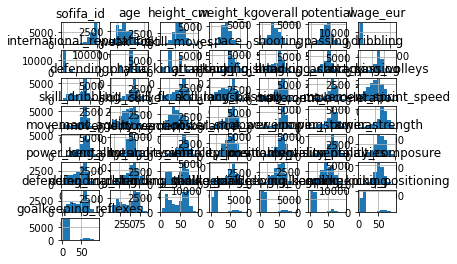

In [ ]:

from pandas import DataFrame
from matplotlib import pyplot



fifa_num = DataFrame(fifa_num)
# summarize
# histograms of the variables
fifa_num.hist()
pyplot.show()

We see data is not normally  distributed


# Data Scaling using standardization

As we have data on different scales and units, it is important to scale the data.
Since our data is not normally distributed, we shall use the Min Max scaling method

(Before scaling we assign the sofifa_id column to a variable and take it out of the id column as it is not a trait )

In [ ]:

#ids = fifa_num.sofifa_id.tolist() # saving names for later https://www.geeksforgeeks.org/python-pandas-series-tolist/

#fifa_num = fifa_num.drop(['sofifa_id'], axis = 1) # drop the fifa_id column

In [ ]:
from sklearn import preprocessing

x = fifa_num.values # numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

X_norm.head()




,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0.623689,0.615385,0.285714,0.366667,1.000000,0.978261,1.000000,1.00,0.75,0.75,0.875000,0.987179,1.000000,1.000000,0.320000,0.619048,0.943182,1.000000,0.738636,1.000000,0.977011,1.000000,0.988636,1.000000,1.000000,1.000000,0.929412,0.858824,0.964706,0.986667,0.976471,0.888889,0.644737,0.741176,0.623377,1.000000,0.453488,0.415730,0.989247,1.000000,0.800000,1.000000,0.344086,0.367816,0.264368,0.056180,0.109890,0.152174,0.144444,0.076923
1,0.079453,0.692308,0.632653,0.550000,0.978261,0.956522,0.716814,1.00,0.75,1.00,0.916667,1.000000,0.852941,0.904110,0.266667,0.809524,0.897727,0.989247,0.954545,0.894118,0.965517,0.913978,0.852273,0.800000,0.821429,0.956044,0.905882,0.941176,0.894118,1.000000,0.694118,1.000000,1.000000,0.858824,0.753247,0.988889,0.627907,0.292135,1.000000,0.858824,0.917647,0.988095,0.290323,0.310345,0.241379,0.067416,0.109890,0.152174,0.144444,0.109890
2,0.753967,0.423077,0.387755,0.300000,0.956522,0.934783,0.513274,1.00,1.00,1.00,0.930556,0.897436,0.926471,0.986301,0.226667,0.492063,0.931818,0.913978,0.647727,0.941176,0.965517,0.989247,0.931818,0.922222,0.869048,0.989011,0.964706,0.917647,1.000000,0.946667,0.847059,0.814815,0.552632,0.811765,0.376623,0.888889,0.488372,0.370787,0.913978,0.952941,0.976471,0.976190,0.279570,0.241379,0.298851,0.089888,0.087912,0.152174,0.155556,0.109890
3,0.791716,0.384615,0.653061,0.616667,0.934783,0.956522,0.221239,0.50,0.50,0.00,0.597222,0.576923,0.544118,0.575342,0.640000,0.634921,0.090909,0.096774,0.113636,0.423529,0.114943,0.086022,0.079545,0.111111,0.380952,0.274725,0.364706,0.576471,0.658824,0.893333,0.435294,0.555556,0.776316,0.341176,0.753247,0.088889,0.290698,0.179775,0.096774,0.658824,0.047059,0.666667,0.279570,0.080460,0.172414,0.966292,1.000000,0.836957,0.988889,0.967033
4,0.723849,0.461538,0.387755,0.400000,0.934783,0.913043,0.831858,0.75,0.75,0.75,0.930556,0.871795,0.911765,0.972603,0.266667,0.619048,0.863636,0.881720,0.636364,0.964706,0.919540,0.978495,0.875000,0.833333,0.892857,0.978022,0.964706,0.905882,0.988235,0.920000,0.964706,0.839506,0.486842,0.847059,0.558442,0.844444,0.523256,0.426966,0.913978,0.941176,0.952941,0.940476,0.354839,0.252874,0.218391,0.112360,0.120879,0.054348,0.077778,0.076923



We can see that the distributions have been adjusted and that the minimum and maximum values for each variable are now a crisp 0.0 and 1.0 respectively.

# Principal component analysis
As fifa20 dataset is a high dimesional dataset with various traits/variables on which player can be grouped into clusters, we used a next step to reduce the dimensionality of this dataset before running the K-means

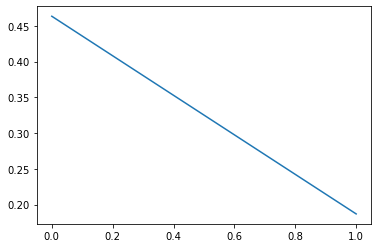

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # 2D PCA for the plot
reduced = pd.DataFrame(pca.fit_transform(X_norm))

plt.plot(pca.explained_variance_ratio_)


#KMeans

In [ ]:
fifa_num=fifa_num.iloc[:,0:50]


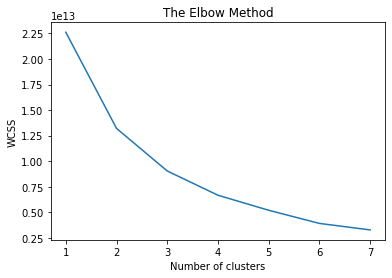

In [ ]:
#elbow method
from sklearn.cluster import KMeans
wcss=[]     # Within-Cluster-Sum-of-Squares
for i in range (1,8):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(fifa_num)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,8),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()



#https://analyticsindiamag.com/beginners-guide-to-k-means-clustering/

Optimum number of cluster is  3 or 4. We shall validate these two cluster through silhoutte score

> Indented block



In [ ]:
'''Another method of finding number of cluster
# Plot Inertia vs. n_clusters
wcss = []
for k in range (1,8):
    km=KMeans(n_clusters=k,random_state=1,init='k-means++', n_init=10)
    km.fit(fifa_num)
    error=km.inertia_
    wcss.append (error)
    
wcss

plt.plot(range(1,8),wcss)
plt.title('k')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()
'''

"Another method of finding number of cluster\n# Plot Inertia vs. n_clusters\nwcss = []\nfor k in range (1,8):\n    km=KMeans(n_clusters=k,random_state=1,init='k-means++', n_init=10)\n    km.fit(fifa_num)\n    error=km.inertia_\n    wcss.append (error)\n    \nwcss\n\nplt.plot(range(1,8),wcss)\nplt.title('k')\nplt.xlabel('k')\nplt.ylabel('WCSS')\nplt.show()\n"

In [ ]:
from sklearn.cluster import KMeans

# specify the number of clusters
kmeans = KMeans(n_clusters=3)   #deduced from the elbow method graph

# fit the input data
kmeans = kmeans.fit(reduced)

# get the cluster labels
labels = kmeans.predict(reduced)

# centroid values
centroid = kmeans.cluster_centers_

# cluster values
clusters = kmeans.labels_.tolist()

print(centroid)
#print(clusters)


from sklearn.metrics import silhouette_samples, silhouette_score


# Calculate Silhoutte Score
#
score = silhouette_score(reduced, labels, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)



#score = silhouette_score(reduced, labels)
#print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
    
    
    
    
    
    


[[-0.41246715 -0.47272269]
 [ 2.09853148 -0.26736703]
 [-0.12266794  0.51019612]]
Silhouetter Score: 0.483


*Make* a new data frame by adding players' names and their cluster

In [ ]:
reduced['cluster'] = clusters
reduced['short_name'] = s_name
reduced.columns = ['x', 'y', 'cluster', 'short_name']
reduced.head()




,x,y,cluster,short_name
0,-1.817510,-1.149241,0,L. Messi
1,-1.699350,-1.035902,0,Cristiano Ronaldo
2,-1.692695,-1.292895,0,Neymar Jr
3,1.884949,-0.284545,1,J. Oblak
4,-1.605212,-1.127597,0,E. Hazard


In [ ]:
#to count how sample inside each cluster
count0=0
count1=0
count2=0



for i in clusters:
    if i==0:
        count0=count0+1
    elif i==1:
        count1=count1+1
    elif i==2:
        count2=count2+1
    else:
        continue
print("cluster0",count0)
print("cluster1",count1)
print("cluster2",count2)


cluster0 7909
cluster1 2037
cluster2 8332


In [ ]:
#import matplotlib.pyplot as plt
#import seaborn as sns
#%matplotlib inline

In [ ]:
#np.random.seed(0)
#mu = 170 #mean
#sigma = 6 #stddev
#sample = 100
#height = np.random.normal(mu, sigma, sample)
#weight = (height-100) * np.random.uniform(0.75, 1.25, 100)

[-0.41246715  2.09853148 -0.12266794]
[-0.47272269 -0.26736703  0.51019612]


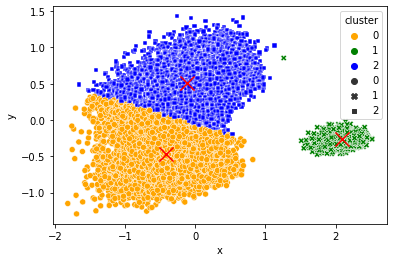

In [ ]:
# Creates a scatter plot
sns.scatterplot(
    x='x', 
    y='y',
    data=reduced, 
    hue='cluster',
    style=kmeans.labels_,
    palette=["orange", "green", "blue"])

# Adds cluster centers to the same plot
plt.scatter(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    marker='x',
    s=200,
    c='red')

print(kmeans.cluster_centers_[:,0])
print(kmeans.cluster_centers_[:,1])

**********************************************************************************

# Improvement Steps
We can try other steps to further imporvise the clustering

We can look at excluding the goalkeeper data and rerun the clusters

Exclude rows that have many empty cells

Data visualisation: Split according to (physical attributes like height weight), (power attributes)

